# Visualização dos Dados

In [2]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('musicas_features.xlsx', usecols = "B:T")
df.dropna(subset=['id'])
df.head()

,Posicao,Musica,Artista,Ano,id,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1.0,Balancê,Gal Costa,1980.0,2m1G38M0gJuE4aVPh0tmIP,1979-01-08,0.638,0.736,9.0,-10.536,1.0,0.0811,0.0849,0.000000,0.333,0.881,144.823,188667.0,4.0
1,4.0,Momentos,Joanna,1980.0,5ncQCIFnjpHWRXbuKFG8RP,2002-11-08,0.501,0.296,7.0,-12.018,0.0,0.0292,0.8020,0.006370,0.117,0.305,132.462,235147.0,4.0
2,5.0,Menino do Rio,Baby Consuelo,1980.0,6tisytwaOaBA4CAZPPdlFP,1978-09-14,0.380,0.548,0.0,-9.260,1.0,0.0333,0.7300,0.000142,0.310,0.395,152.498,263733.0,4.0
3,6.0,Toada (Na Direção do Dia),Boca Livre,1980.0,2LO6c0rfmBm49Qs9KtQR1W,2007-01-01,0.402,0.506,6.0,-13.094,0.0,0.0409,0.9280,0.000946,0.728,0.446,97.082,233707.0,4.0
4,9.0,Meu Bem Querer,Djavan,1980.0,5ogHB4oYt1C7kaWJYm5MDG,1999-03-25,0.519,0.457,9.0,-8.450,1.0,0.0326,0.7630,0.000666,0.796,0.264,81.561,254800.0,4.0


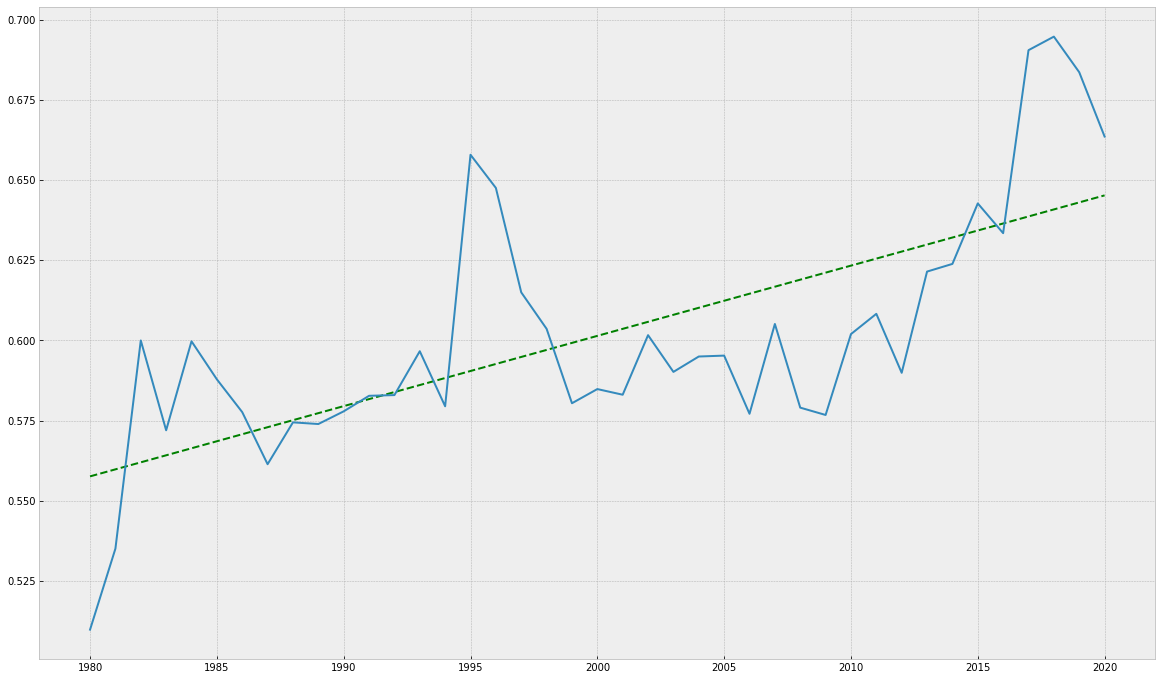

In [40]:
feature = df.groupby(by='Ano').mean()['danceability'].reset_index()

# plt.plot('Ano', 'danceability', data=feature, marker='', color='red', linewidth=2)
z = np.polyfit(feature['Ano'], feature['danceability'], 1)
p = np.poly1d(z)
plt.plot(feature['Ano'],p(feature['Ano']),"g--")
plt.plot(feature['Ano'], feature['danceability'])

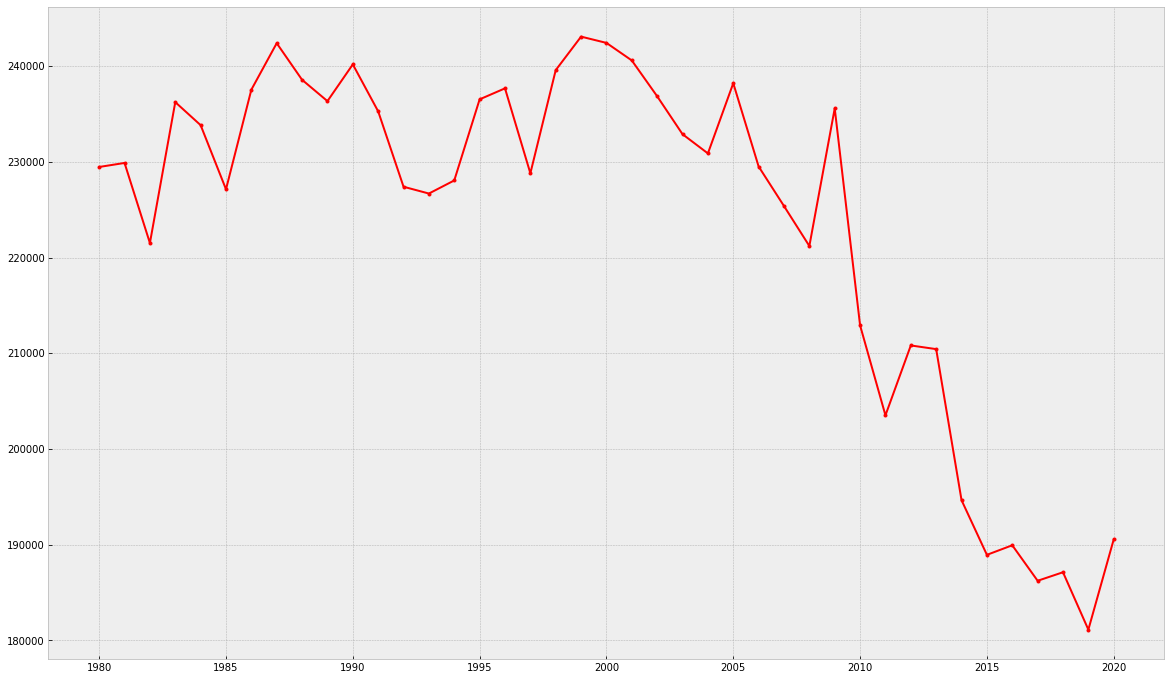

In [41]:
feature = df.groupby(by='Ano').mean()['duration_ms'].reset_index()

plt.plot('Ano', 'duration_ms', data=feature, marker='.', color='red', linewidth=2)

<AxesSubplot:xlabel='Ano', ylabel='tempo'>

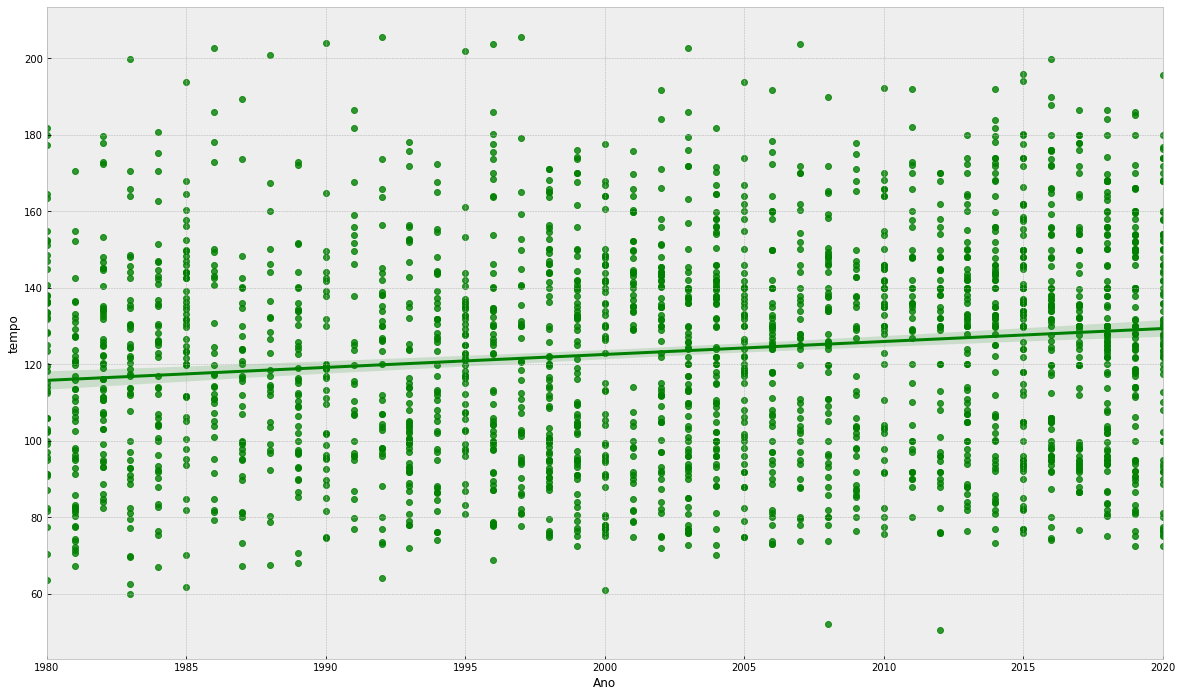

In [27]:
sns.regplot(x=df["Ano"], y=df["tempo"], color="g")

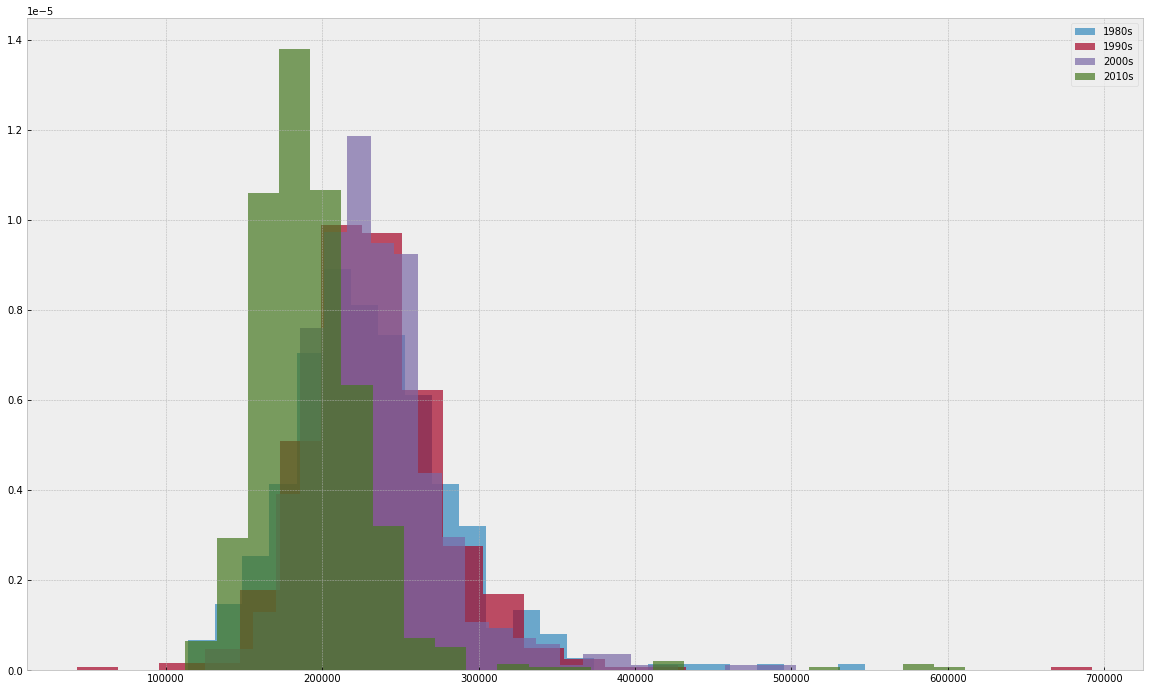

In [4]:
np.random.seed(19680801)
plt.rcParams["figure.figsize"] = (20,12)

plt.style.use('bmh')

fig, ax = plt.subplots()

ax.hist(df[(df['Ano'] >= 1980) & (df['Ano'] < 1990)]['duration_ms'], 
        histtype="stepfilled", bins=25, alpha=0.7, density=True, label='1980s')
ax.hist(df[(df['Ano'] >= 1990) & (df['Ano'] < 2000)]['duration_ms'], 
        histtype="stepfilled", bins=25, alpha=0.7, density=True, label='1990s')
ax.hist(df[(df['Ano'] >= 2000) & (df['Ano'] < 2010)]['duration_ms'], 
        histtype="stepfilled", bins=25, alpha=0.7, density=True, label='2000s')
ax.hist(df[(df['Ano'] >= 2010) & (df['Ano'] <= 2020)]['duration_ms'], 
        histtype="stepfilled", bins=25, alpha=0.7, density=True, label='2010s')

# ax.set_title("'bmh' style sheet")
plt.legend()
plt.show()

/home/andrepalhares/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ano', ylabel='energy'>

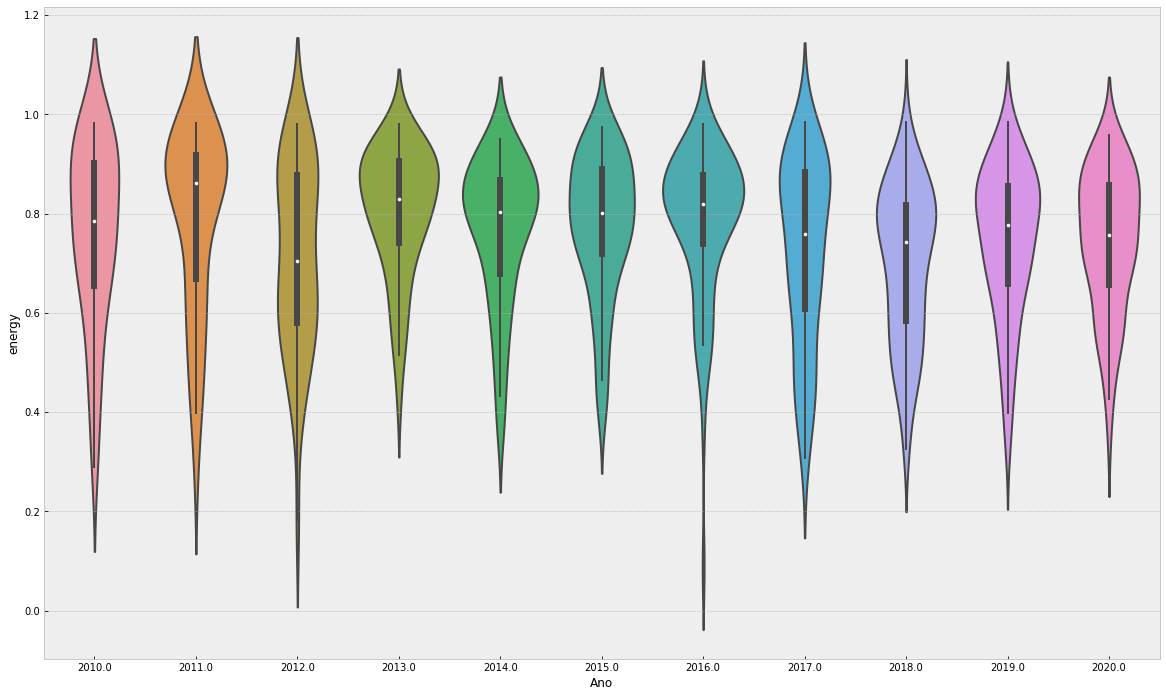

In [30]:
decada_2010 = df[(df['Ano'] >= 2010) & (df['Ano'] <= 2020)]
sns.violinplot(decada_2010['Ano'], y=decada_2010["energy"])

<AxesSubplot:xlabel='Ano', ylabel='Percentual'>

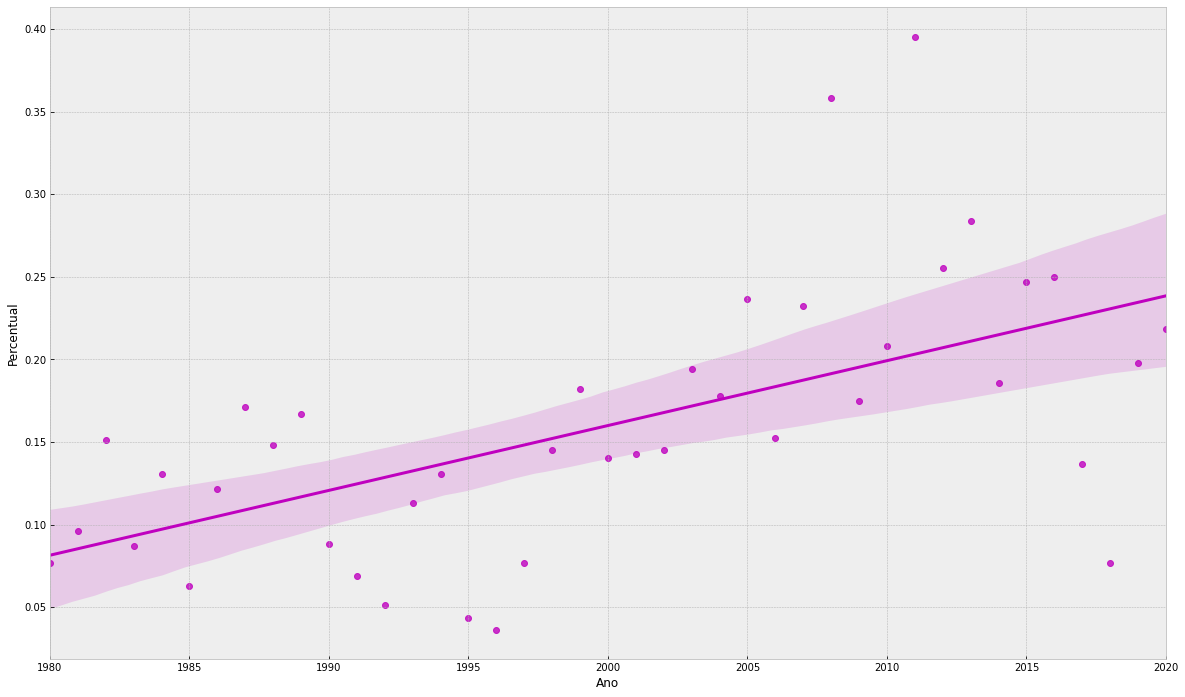

In [90]:
liveness = pd.DataFrame({'Ano': [], 'Percentual': []})

liveness['Ano'] = df.groupby(['Ano']).agg({'liveness': 'count'}).reset_index()['Ano']
liveness['Percentual'] = df[df['liveness'] > 0.8].groupby(['Ano']).agg({'liveness': 'count'}).reset_index()['liveness'] / df.groupby(['Ano']).agg({'liveness': 'count'}).reset_index()['liveness']

sns.regplot(x=liveness['Ano'], y=liveness['Percentual'], color="m")

In [87]:
df.groupby(by='Ano').mean().reset_index()

,Ano,Posicao,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1980.0,52.796296,0.509827,0.511596,5.326923,-10.973788,0.769231,0.054377,0.560271,0.013169,0.297398,0.520000,122.184808,229470.057692,3.884615
1,1981.0,50.719298,0.535077,0.533962,4.365385,-10.459385,0.634615,0.055960,0.514094,0.005532,0.349383,0.541508,107.135231,229889.884615,3.865385
2,1982.0,46.250000,0.599981,0.561153,5.566038,-10.682453,0.849057,0.066892,0.429068,0.009265,0.334477,0.625130,121.156358,221520.735849,3.962264
3,1983.0,48.076923,0.571978,0.599800,5.500000,-9.219348,0.739130,0.070341,0.397902,0.002355,0.284991,0.616467,116.043717,236245.217391,3.891304
4,1984.0,48.942308,0.599717,0.631804,4.891304,-9.546022,0.652174,0.067867,0.320717,0.003750,0.305835,0.667002,119.495348,233838.521739,3.956522
5,1985.0,47.622642,0.587854,0.597806,4.916667,-10.245521,0.687500,0.045602,0.383304,0.045670,0.262662,0.621748,128.419750,227136.437500,3.979167
6,1986.0,51.925000,0.577636,0.662545,4.515152,-8.505455,0.818182,0.065158,0.290607,0.021318,0.337694,0.654424,124.046667,237548.181818,3.969697
7,1987.0,50.475000,0.561400,0.583914,5.371429,-9.668543,0.742857,0.047771,0.406733,0.053449,0.372534,0.590686,114.275600,242404.742857,3.914286
8,1988.0,46.441176,0.574444,0.609148,6.518519,-9.480185,0.666667,0.047570,0.402681,0.032102,0.325674,0.582437,120.711333,238577.629630,4.000000
9,1989.0,48.347826,0.573929,0.606643,5.238095,-9.984143,0.809524,0.045500,0.407308,0.000528,0.361326,0.635888,115.903571,236352.452381,3.904762
